In [154]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [155]:
# load dataset
dic = {}
df = pd.read_csv('./chicago-west-nile-virus-mosquito-test-results/west-nile-virus-wnv-mosquito-test-results.csv', encoding="utf-8")

In [156]:
# Original data
print(df.shape)
print(df.dtypes)
df.head()

(27196, 18)
SEASON YEAR                     int64
WEEK                            int64
TEST ID                         int64
BLOCK                          object
TRAP                           object
TRAP_TYPE                      object
TEST DATE                      object
NUMBER OF MOSQUITOES            int64
RESULT                         object
SPECIES                        object
LATITUDE                      float64
LONGITUDE                     float64
LOCATION                       object
Wards                         float64
Census Tracts                 float64
Zip Codes                     float64
Community Areas               float64
Historical Wards 2003-2015    float64
dtype: object


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
0,2018,39,47726,4XX W 127TH,T135,GRAVID,2018-09-27T00:09:00.000,2,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,39,47720,5XX W 72ND ST,T035,GRAVID,2018-09-27T00:09:00.000,9,negative,CULEX PIPIENS/RESTUANS,41.763371,-87.637873,"{'longitude': '-87.6378726141474', 'human_addr...",32.0,511.0,21559.0,66.0,17.0
2,2018,39,47690,100XX W OHARE AIRPORT,T913,GRAVID,2018-09-27T00:09:00.000,15,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,39,47707,1XX N CENTRAL PARK DR,T030B,SENTINEL,2018-09-27T00:09:00.000,23,negative,CULEX PIPIENS,41.883711,-87.716092,"{'longitude': '-87.71609209177537', 'human_add...",23.0,176.0,21572.0,28.0,11.0
4,2018,39,47733,131XX S BRANDON AVE,T209,GRAVID,2018-09-27T00:09:00.000,2,negative,CULEX RESTUANS,41.657069,-87.546049,"{'longitude': '-87.54604886505916', 'human_add...",47.0,787.0,22250.0,52.0,47.0


In [157]:
# Preprocessing
df = df.drop(columns = 'LOCATION') # 已有LATITUDE,LONGITUDE欄位
df['TEST DATE'] = df['TEST DATE'].str.split('T').str[0].str.replace('-', '') # 去掉時間轉為純日期字串
df['TEST DATE'] = df['TEST DATE'].astype('int64') # 字串轉為 int
nonNumCol = ['TRAP', 'BLOCK', 'TRAP_TYPE', 'RESULT', 'SPECIES'] # 非數字欄位

for col in nonNumCol: # 將欄位轉為數值資料
    df[col] = df[col].astype('category')
    dic[col] = dict(enumerate(df[col].cat.categories)) # 類別對照dict
    df[col] = df[col].cat.codes
    
df = df.dropna() # 去除有空值的row

In [158]:
# New data
print(dic)
print(df.shape)
print(df.dtypes)
df.head()

{'TRAP': {0: '220A', 1: 'T001', 2: 'T002', 3: 'T002A', 4: 'T002B', 5: 'T003', 6: 'T004', 7: 'T005', 8: 'T006', 9: 'T007', 10: 'T008', 11: 'T009', 12: 'T009B', 13: 'T011', 14: 'T012', 15: 'T013', 16: 'T014', 17: 'T015', 18: 'T016', 19: 'T017', 20: 'T018', 21: 'T019', 22: 'T025', 23: 'T027', 24: 'T028', 25: 'T028B', 26: 'T030', 27: 'T030B', 28: 'T031', 29: 'T033', 30: 'T034', 31: 'T035', 32: 'T036', 33: 'T037', 34: 'T039', 35: 'T040', 36: 'T043', 37: 'T044', 38: 'T045', 39: 'T046', 40: 'T046B', 41: 'T047', 42: 'T048', 43: 'T049', 44: 'T050', 45: 'T051', 46: 'T054', 47: 'T054A', 48: 'T054B', 49: 'T054C', 50: 'T060', 51: 'T061', 52: 'T062', 53: 'T063', 54: 'T063B', 55: 'T065', 56: 'T065A', 57: 'T066', 58: 'T067', 59: 'T068', 60: 'T069', 61: 'T070', 62: 'T071', 63: 'T072', 64: 'T073', 65: 'T074', 66: 'T074B', 67: 'T075', 68: 'T076', 69: 'T077', 70: 'T078', 71: 'T079', 72: 'T080', 73: 'T081', 74: 'T082', 75: 'T083', 76: 'T084', 77: 'T085', 78: 'T086', 79: 'T087', 80: 'T088', 81: 'T089', 82: 

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
1,2018,39,47720,114,31,1,20180927,9,0,2,41.763371,-87.637873,32.0,511.0,21559.0,66.0,17.0
3,2018,39,47707,40,27,3,20180927,23,0,1,41.883711,-87.716092,23.0,176.0,21572.0,28.0,11.0
4,2018,39,47733,25,138,1,20180927,2,0,3,41.657069,-87.546049,47.0,787.0,22250.0,52.0,47.0
6,2018,39,47719,87,161,1,20180927,3,0,2,41.774841,-87.728006,15.0,6.0,21867.0,63.0,23.0
7,2018,39,47730,21,102,1,20180927,5,0,2,41.662387,-87.590180,47.0,174.0,22250.0,48.0,47.0


In [159]:
data = df.to_numpy() # convert to numpy array
print(data[:1])

[[ 2.01800000e+03  3.90000000e+01  4.77200000e+04  1.14000000e+02
   3.10000000e+01  1.00000000e+00  2.01809270e+07  9.00000000e+00
   0.00000000e+00  2.00000000e+00  4.17633709e+01 -8.76378726e+01
   3.20000000e+01  5.11000000e+02  2.15590000e+04  6.60000000e+01
   1.70000000e+01]]


In [167]:
data = data[:5000] # testing
sil_values = []
for i in range(3, 21):
    clustering = AgglomerativeClustering(n_clusters = i)
    res = clustering.fit(data)
    cluster_labels = res.labels_
    
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    sil_values.append(silhouette_avg)
    
    print("Clusters: ", i)
    print("Silhouette Value: ", silhouette_avg)
    print ("Number of sample in each cluster:")
    print (pd.Series(clustering.labels_).value_counts())
    print("========================================")

Clusters:  3
Silhouette Value:  0.6440014060924043
Number of sample in each cluster:
0    2454
1    2152
2     394
dtype: int64
Clusters:  4
Silhouette Value:  0.6886830741465864
Number of sample in each cluster:
0    2152
1    1284
3    1170
2     394
dtype: int64
Clusters:  5
Silhouette Value:  0.7840664409408673
Number of sample in each cluster:
2    1552
1    1284
3    1170
4     600
0     394
dtype: int64
Clusters:  6
Silhouette Value:  0.8139072695970562
Number of sample in each cluster:
0    1552
1    1284
3    1170
4     600
5     200
2     194
dtype: int64
Clusters:  7
Silhouette Value:  0.8166929498500037
Number of sample in each cluster:
5    1433
1    1284
3    1170
4     600
2     200
0     194
6     119
dtype: int64
Clusters:  8
Silhouette Value:  0.8261101262436031
Number of sample in each cluster:
5    1433
0    1284
1    1170
4     600
2     200
6     119
3     106
7      88
dtype: int64
Clusters:  9
Silhouette Value:  0.8369921156105354
Number of sample in each cluste

In [168]:
print(sil_values)
max_sil = max(sil_values)
idx = sil_values.index(max_sil)+3  # index+3 = number of clusters
print(idx, max_sil)

[0.6440014060924043, 0.6886830741465864, 0.7840664409408673, 0.8139072695970562, 0.8166929498500037, 0.8261101262436031, 0.8369921156105354, 0.8496381219575502, 0.8631013181431477, 0.8701616951684188, 0.7202993917465264, 0.5879841421325178, 0.47630928748083323, 0.4719230277291659, 0.47403405620927913, 0.4726149034056499, 0.4688012748328056, 0.4153131272681327]
12 0.8701616951684188


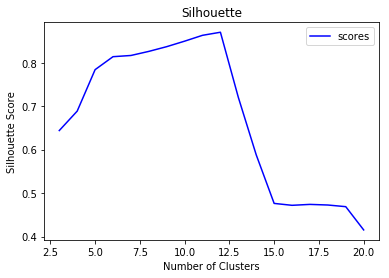

In [170]:
plt.title('Silhouette')
plt.plot(range(3, 21), sil_values, color='blue', label='scores')
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [181]:
clustering = AgglomerativeClustering(n_clusters = idx)
result = clustering.fit(data)
print(result)
print(result.labels_)
print (pd.Series(clustering.labels_).value_counts())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=12,
            pooling_func='deprecated')
[1 1 1 ... 5 5 5]
0     1433
1     1180
2     1071
5      553
4      137
6      119
3      106
8      104
9       99
7       88
10      63
11      47
dtype: int64


In [172]:
cols = list(df.columns.values)
print(len(cols))
print(cols)
col_pairs = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col_pairs.append([cols[i], cols[j]])
print(len(col_pairs))
# print(col_pairs)

17
['SEASON YEAR', 'WEEK', 'TEST ID', 'BLOCK', 'TRAP', 'TRAP_TYPE', 'TEST DATE', 'NUMBER OF MOSQUITOES', 'RESULT', 'SPECIES', 'LATITUDE', 'LONGITUDE', 'Wards', 'Census Tracts', 'Zip Codes', 'Community Areas', 'Historical Wards 2003-2015']
136


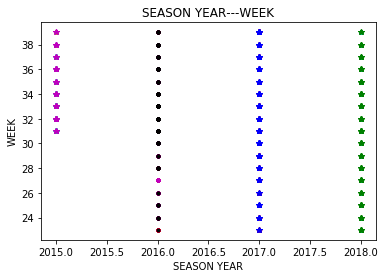

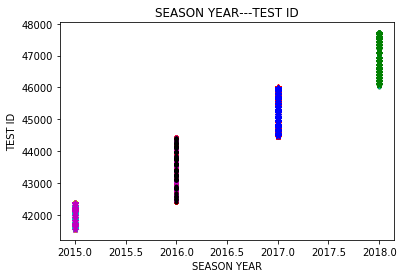

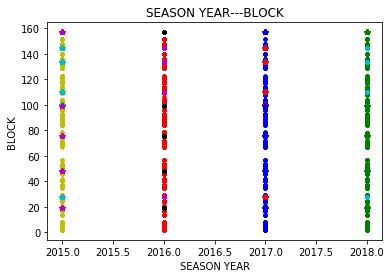

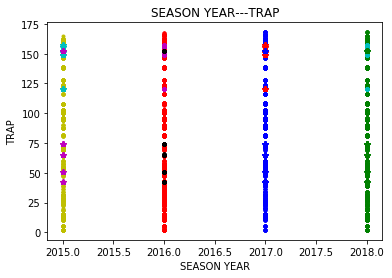

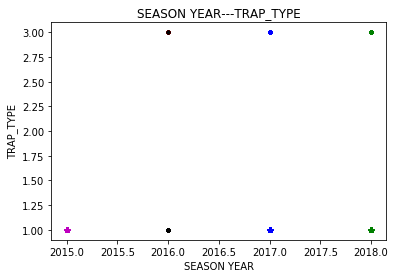

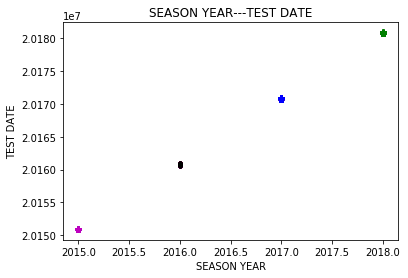

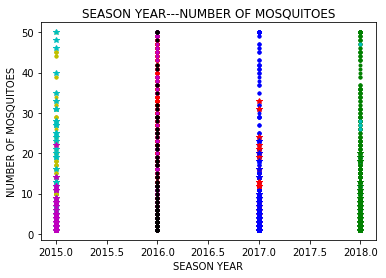

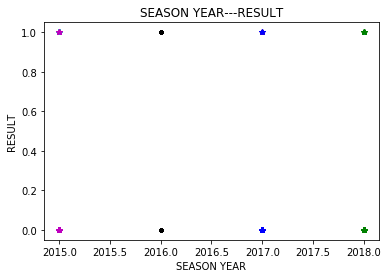

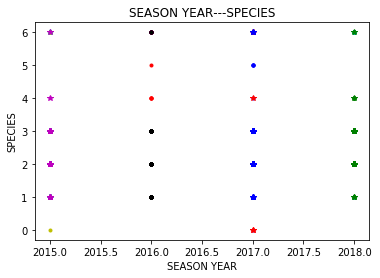

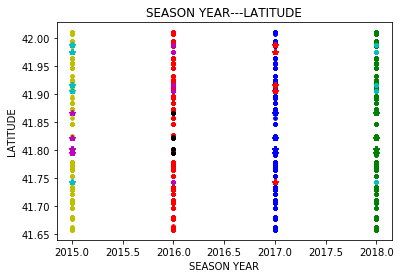

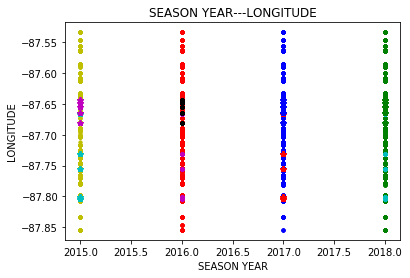

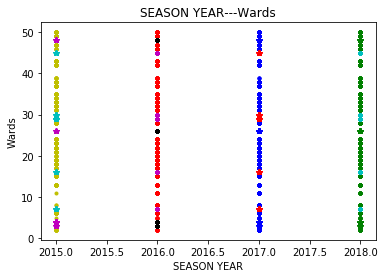

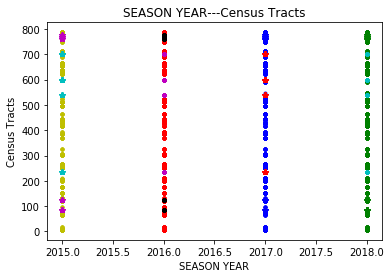

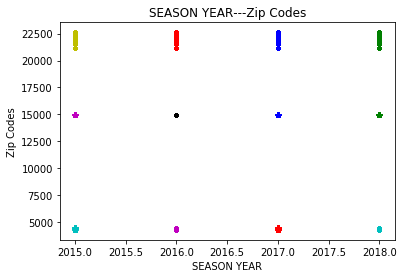

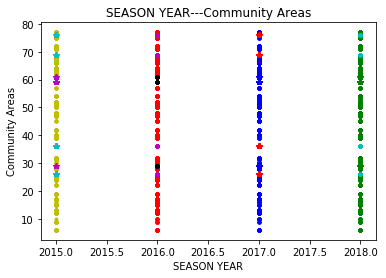

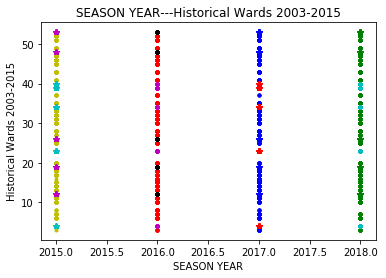

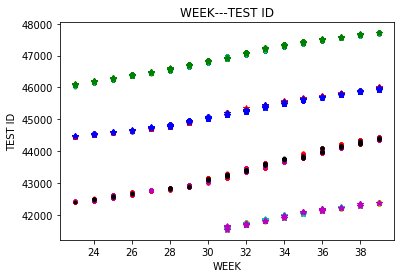

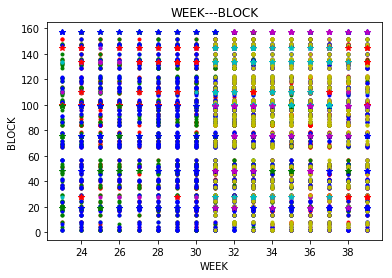

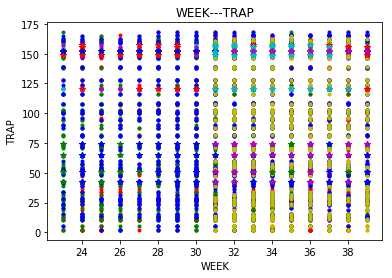

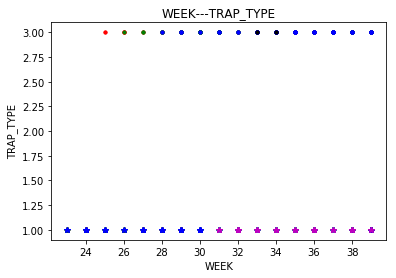

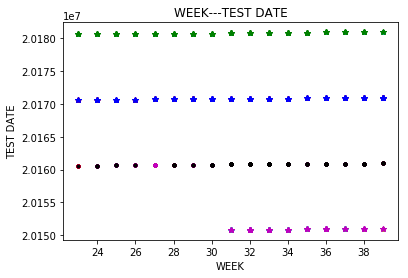

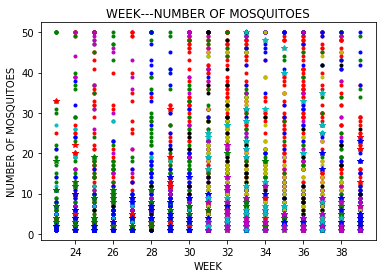

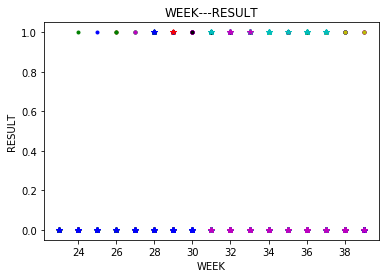

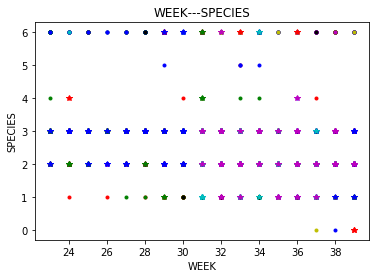

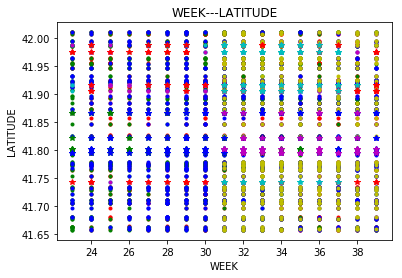

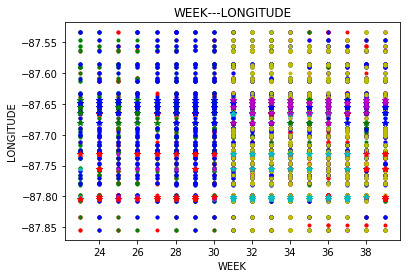

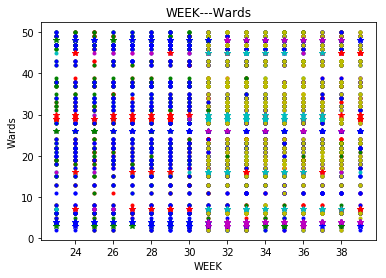

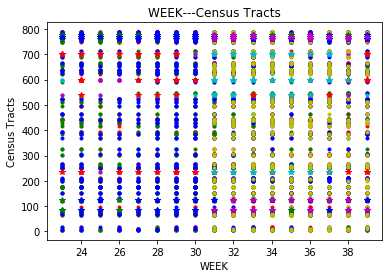

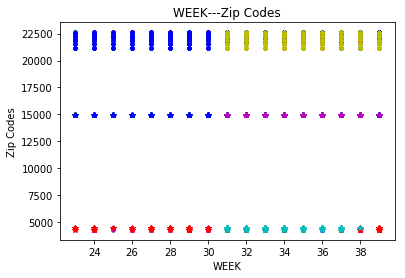

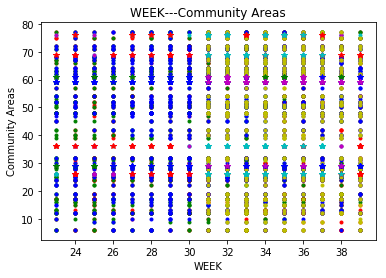

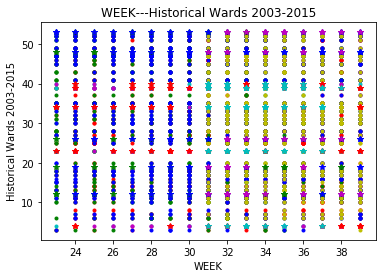

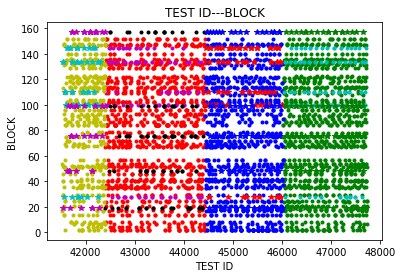

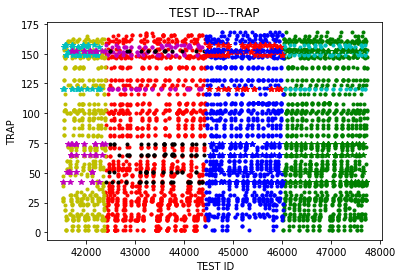

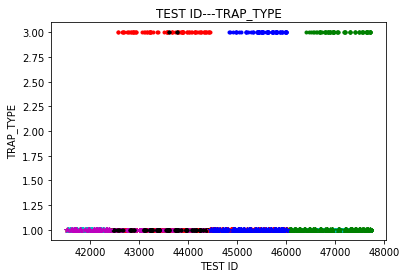

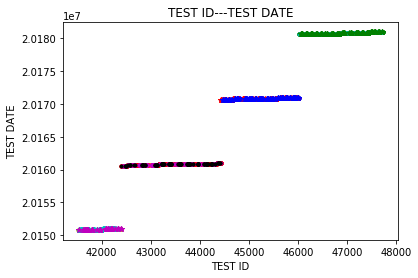

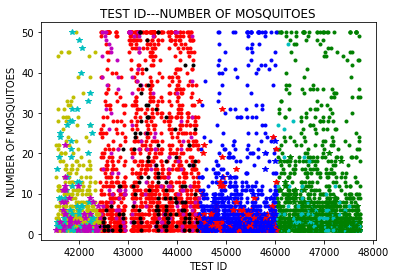

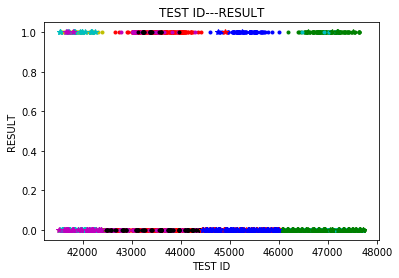

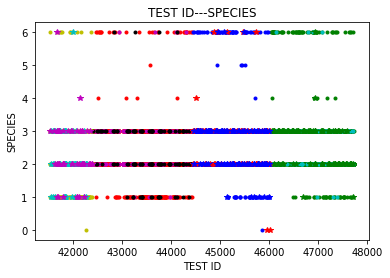

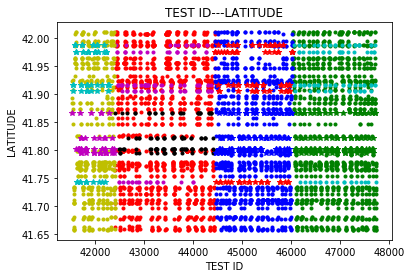

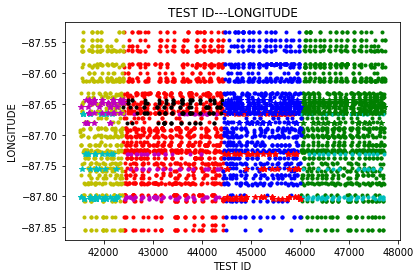

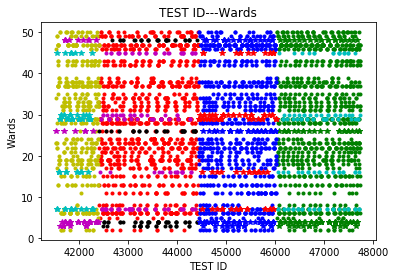

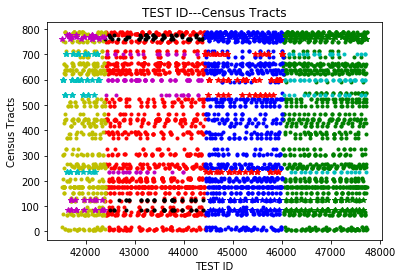

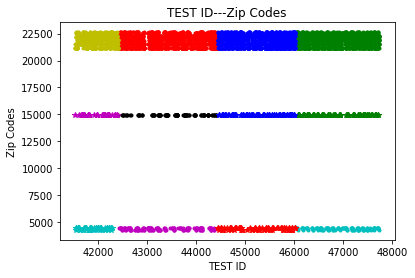

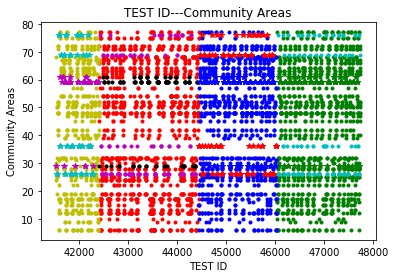

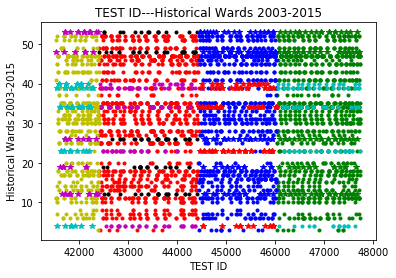

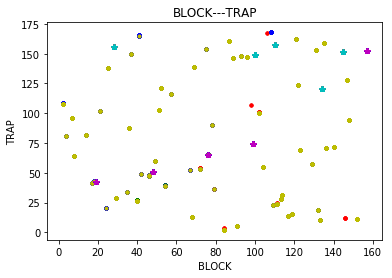

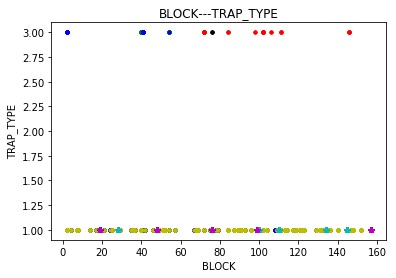

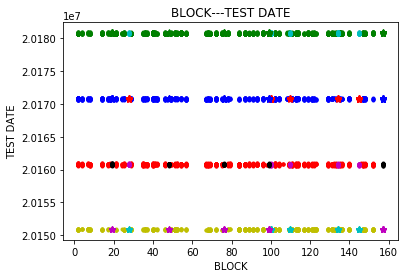

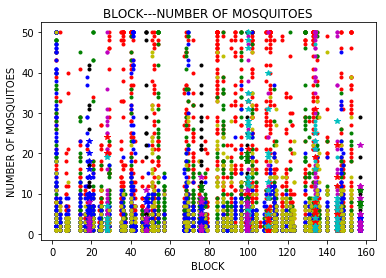

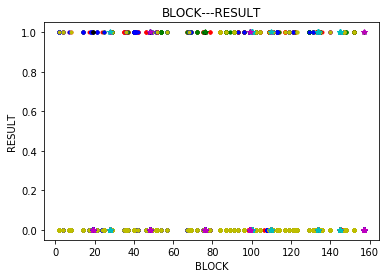

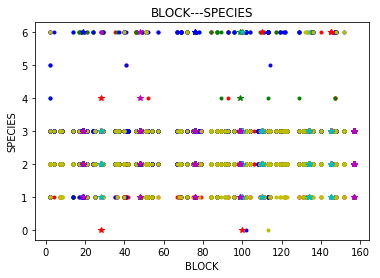

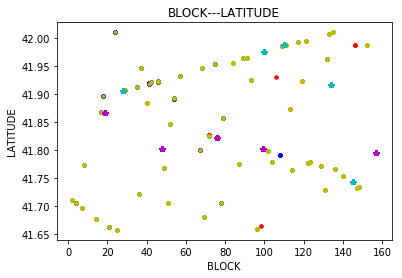

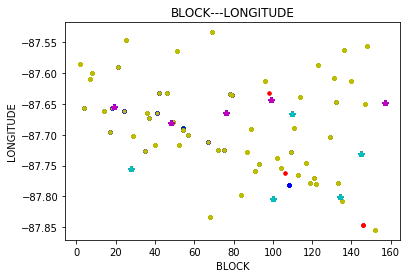

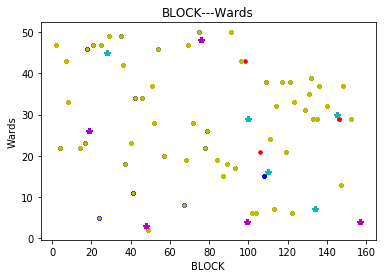

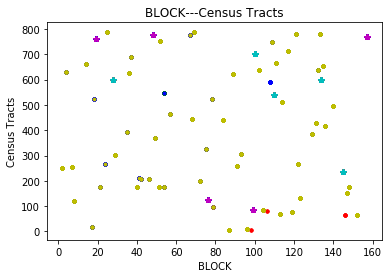

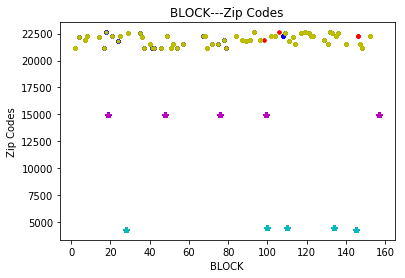

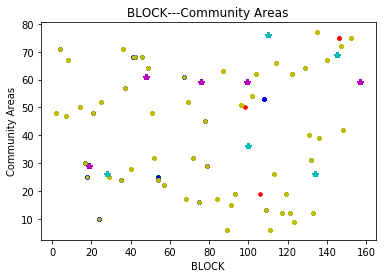

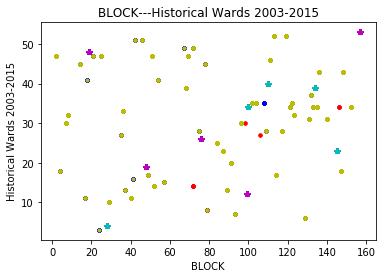

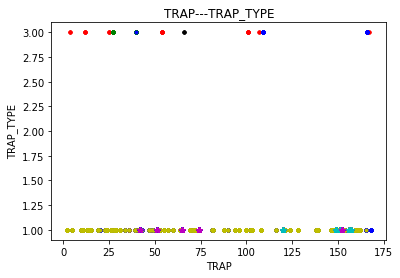

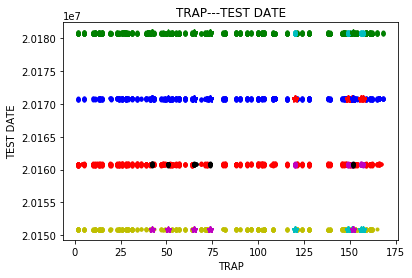

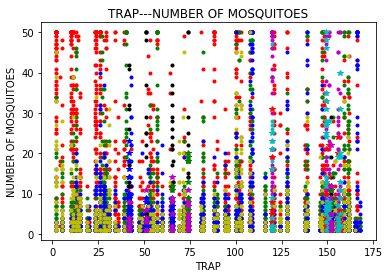

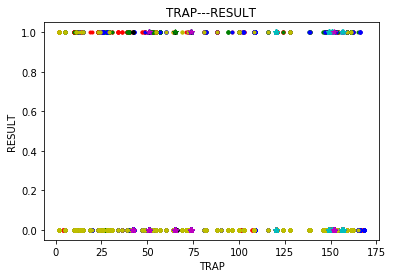

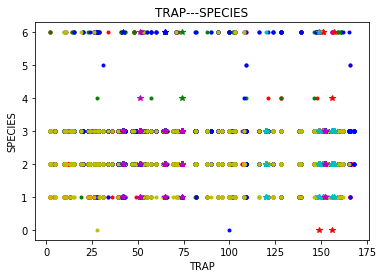

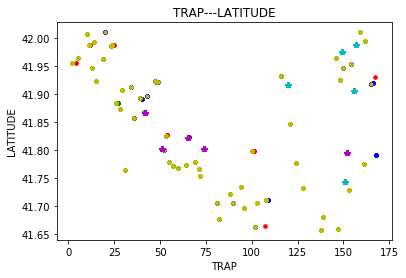

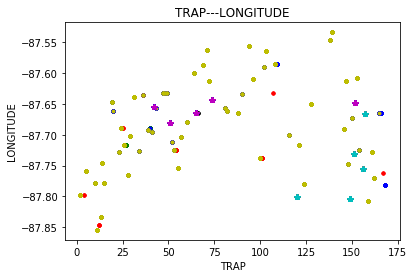

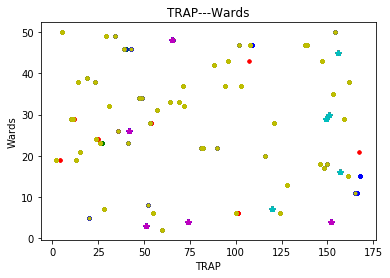

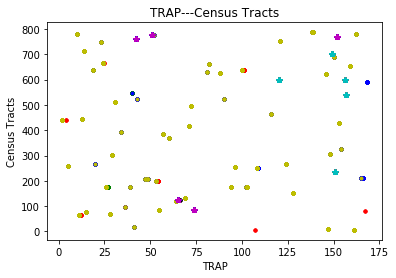

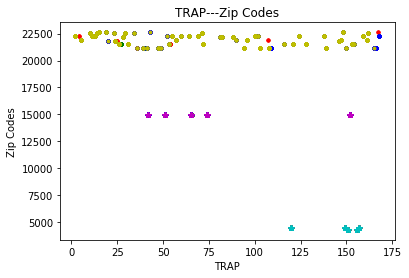

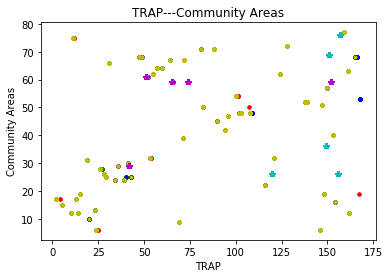

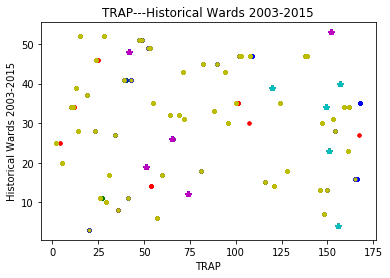

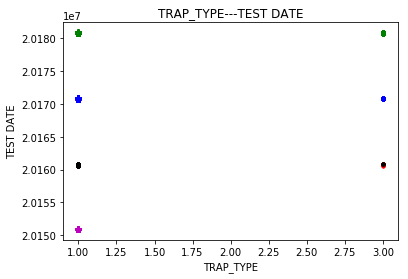

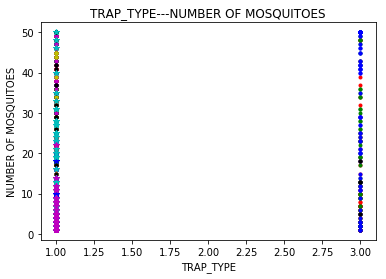

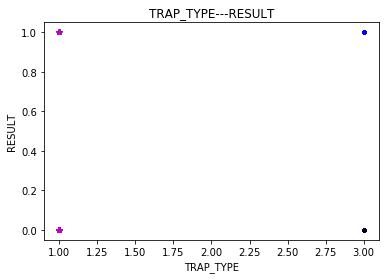

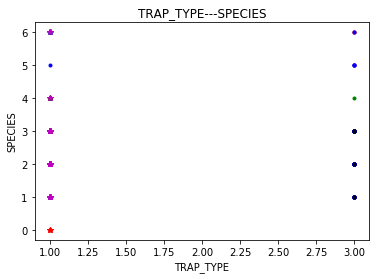

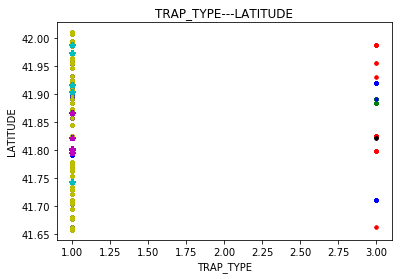

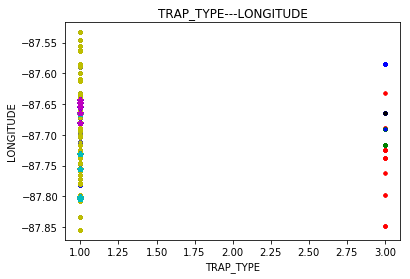

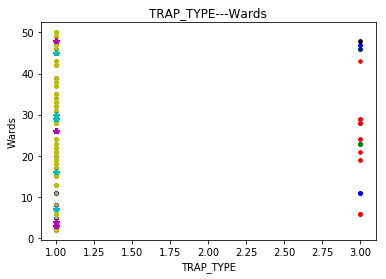

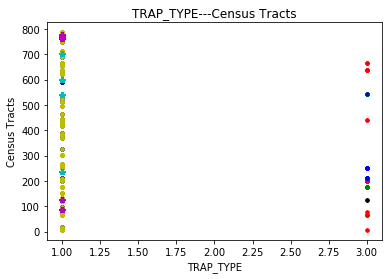

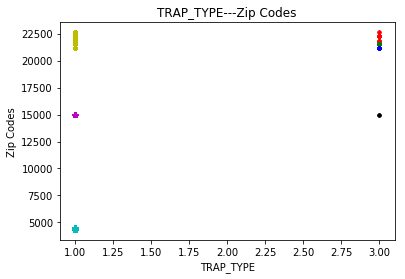

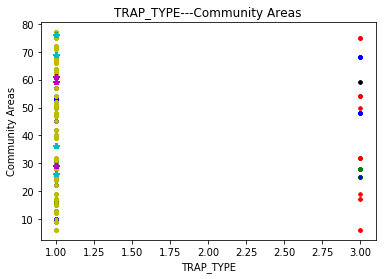

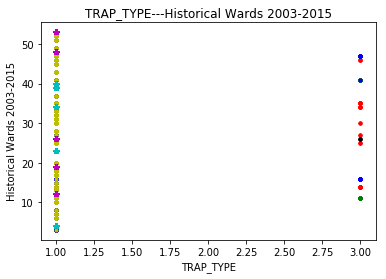

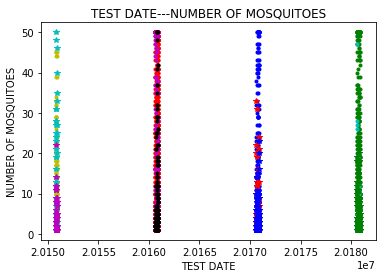

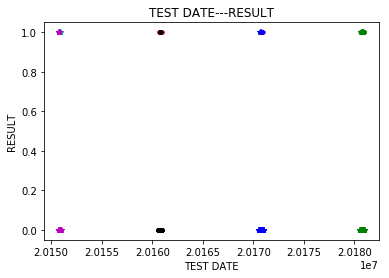

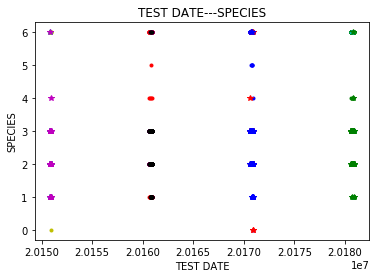

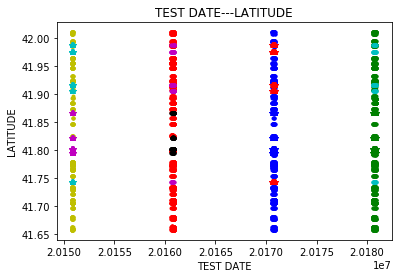

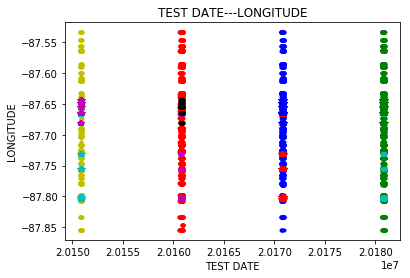

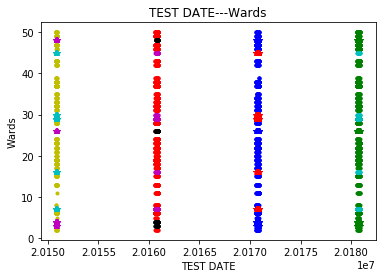

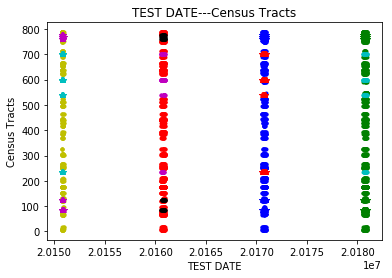

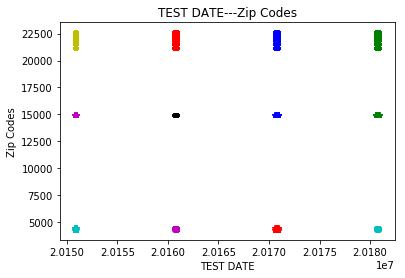

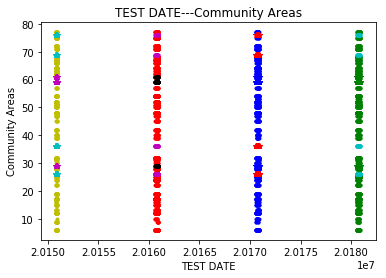

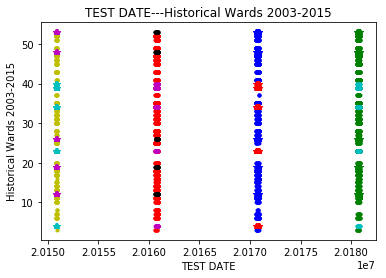

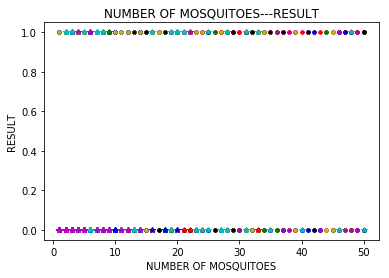

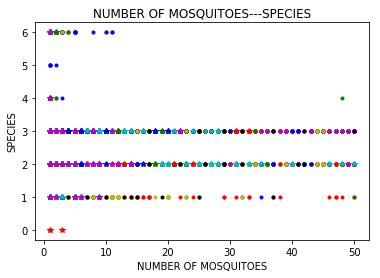

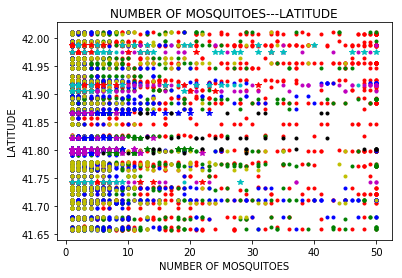

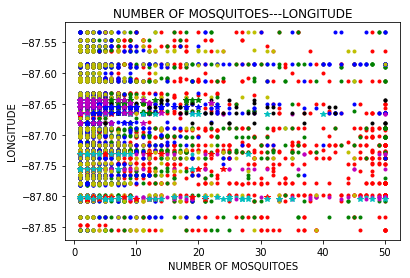

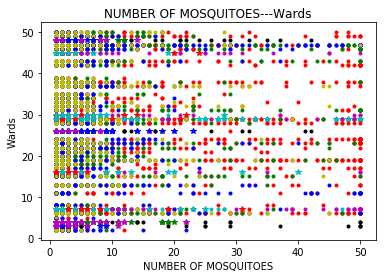

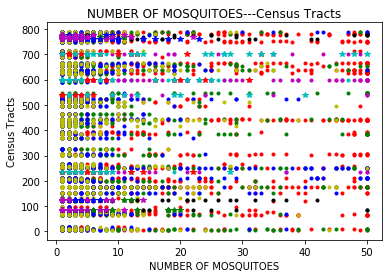

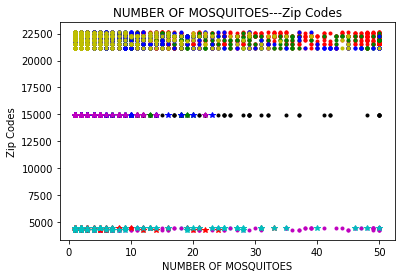

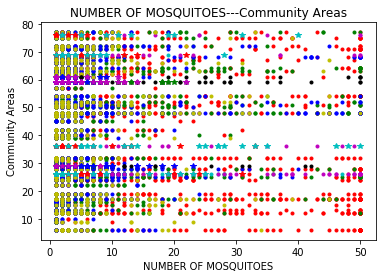

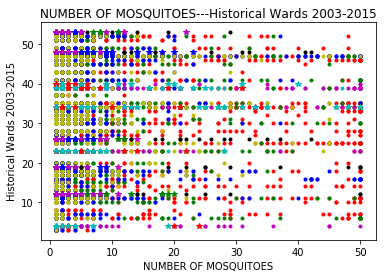

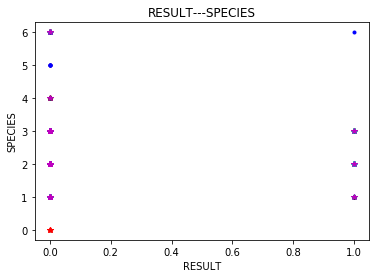

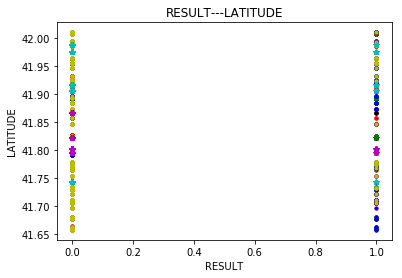

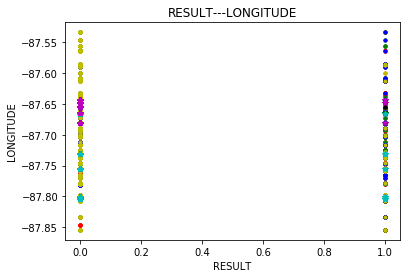

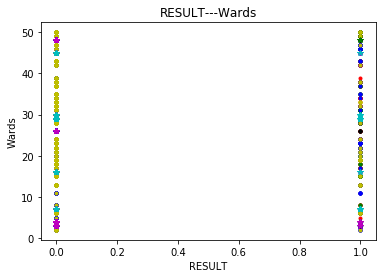

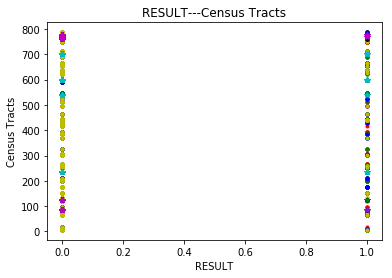

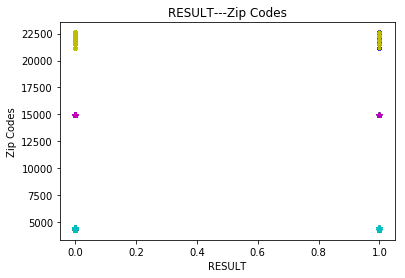

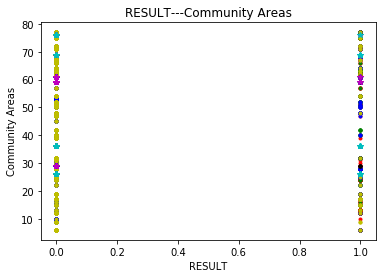

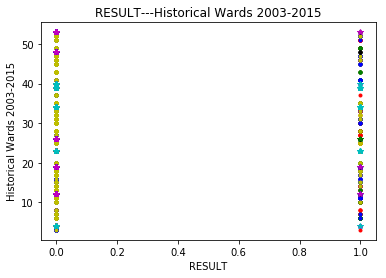

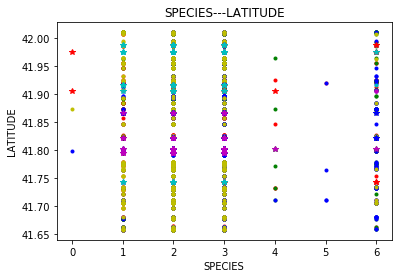

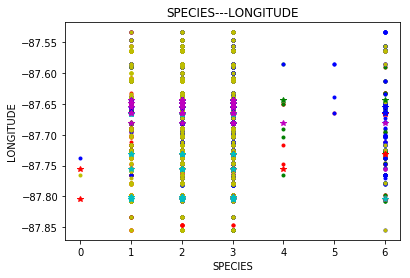

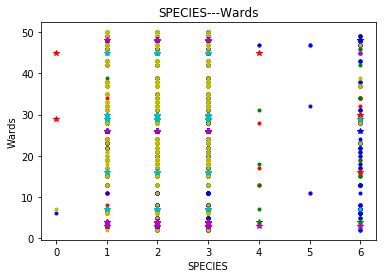

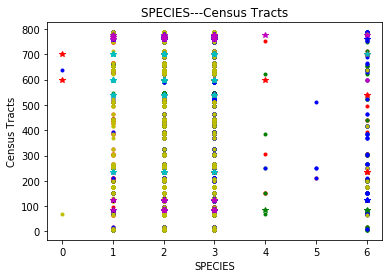

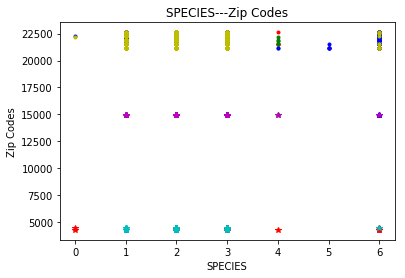

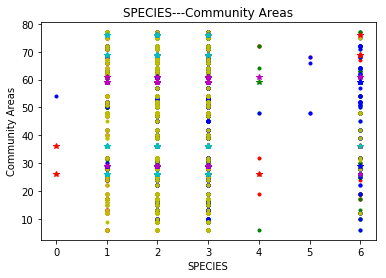

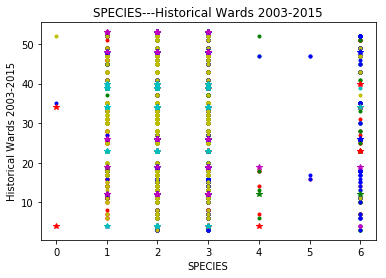

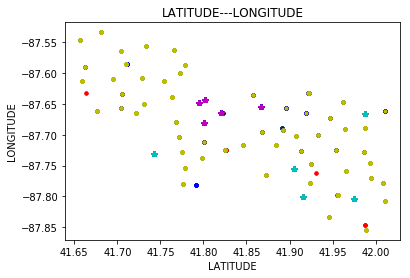

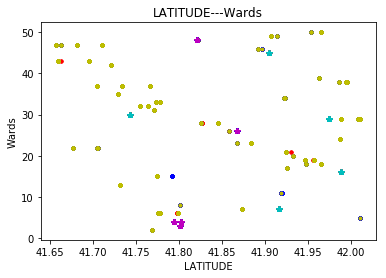

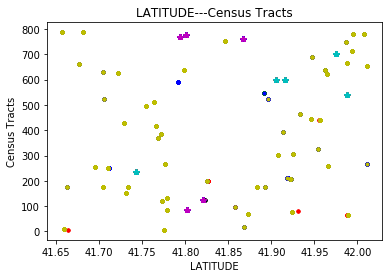

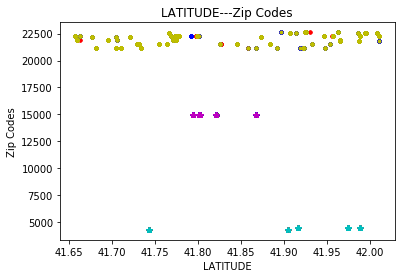

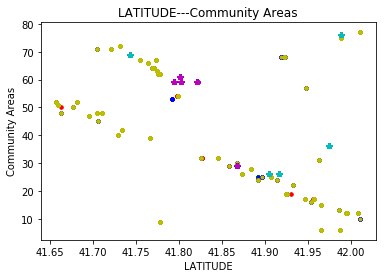

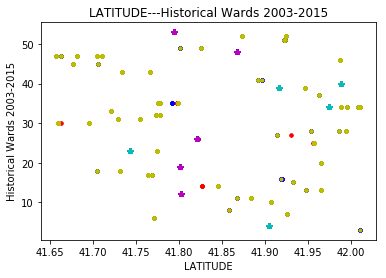

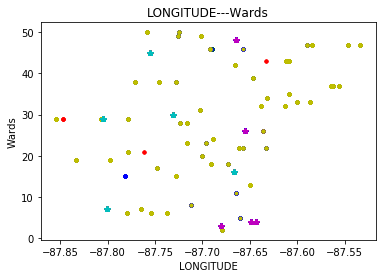

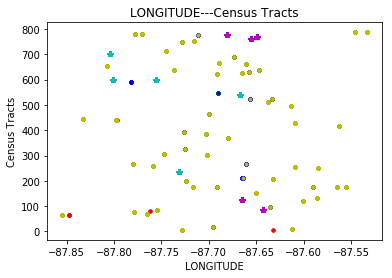

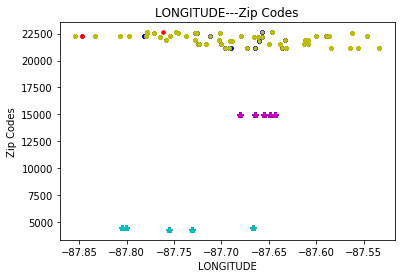

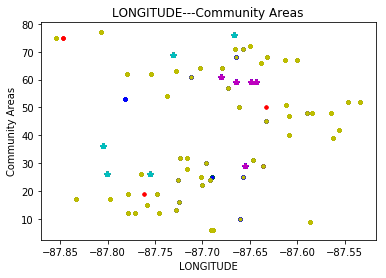

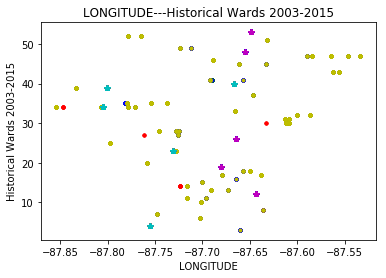

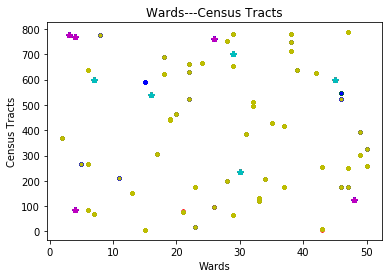

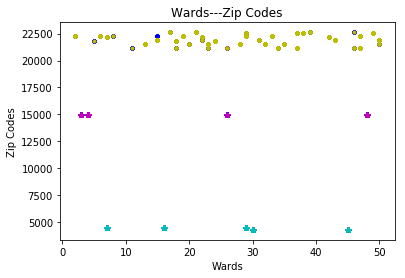

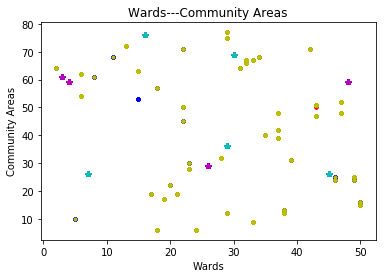

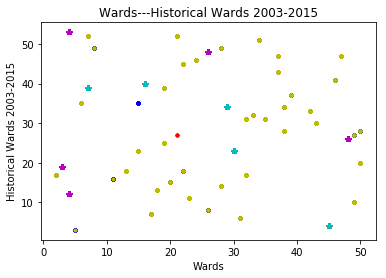

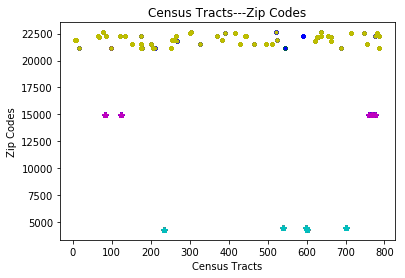

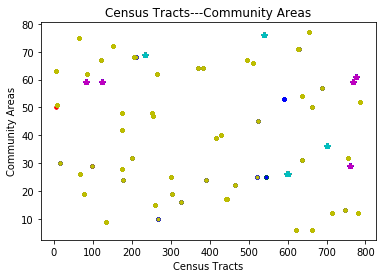

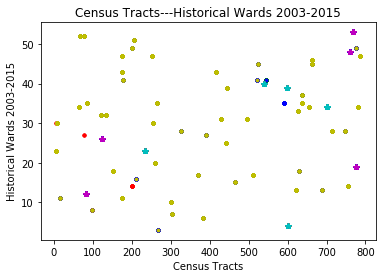

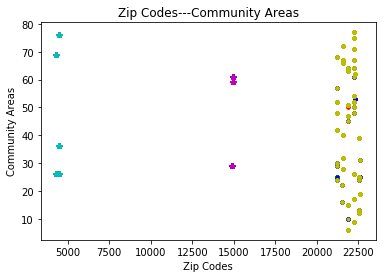

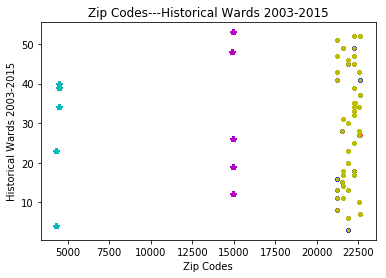

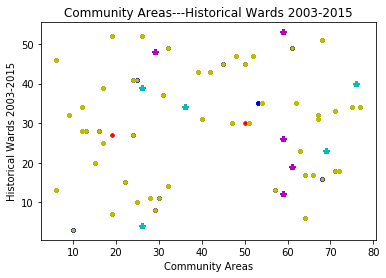

In [191]:
colors = ['r.', 'g.', 'b.', 'c.', 'm.', 'y.', 'k.', 'r*', 'g*', 'b*', 'c*', 'm*', 'y*', 'k*']
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        plt.figure()
        for c in range(idx):
            plt.plot(data[result.labels_ == c][:, i], data[result.labels_ == c][:, j], colors[c])             
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title(cols[i]+'---'+cols[j])
        plt.show()